> # **FASHION MNIST IMAGE CLASSIFICATION UISNG ANN**
> 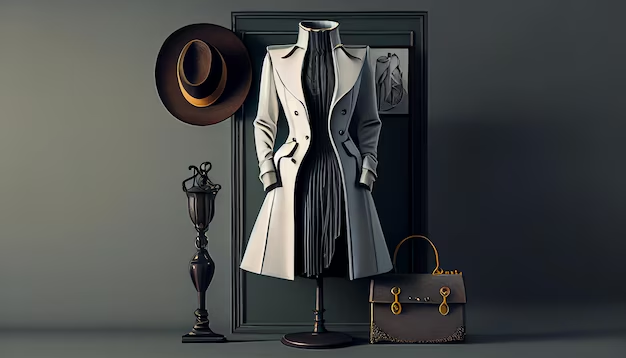 <br><br>
> ### DATASET OVERVIEW
> - Fashion MNIST consists of grayscale images of clothing items. Each image is 28x28 pixels in size.
> - The dataset contains `70,000 images` in total. This is split into 60,000 images for training and 10,000 images for testing.
> - `Categories`: There are 10 different clothing categories, each with 7,000 images. <br><br>
> The categories are:
>   - T-shirt/top
>   - Trouser
>   - Pullover
>   - Dress
>   - Coat
>   - Sandal
>   - Shirt
>   - Sneaker
>   - Bag
>   - Ankle boot

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, accuracy_score

import tensorflow
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Input, Dense, Flatten

from keras.metrics import FBetaScore
from keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

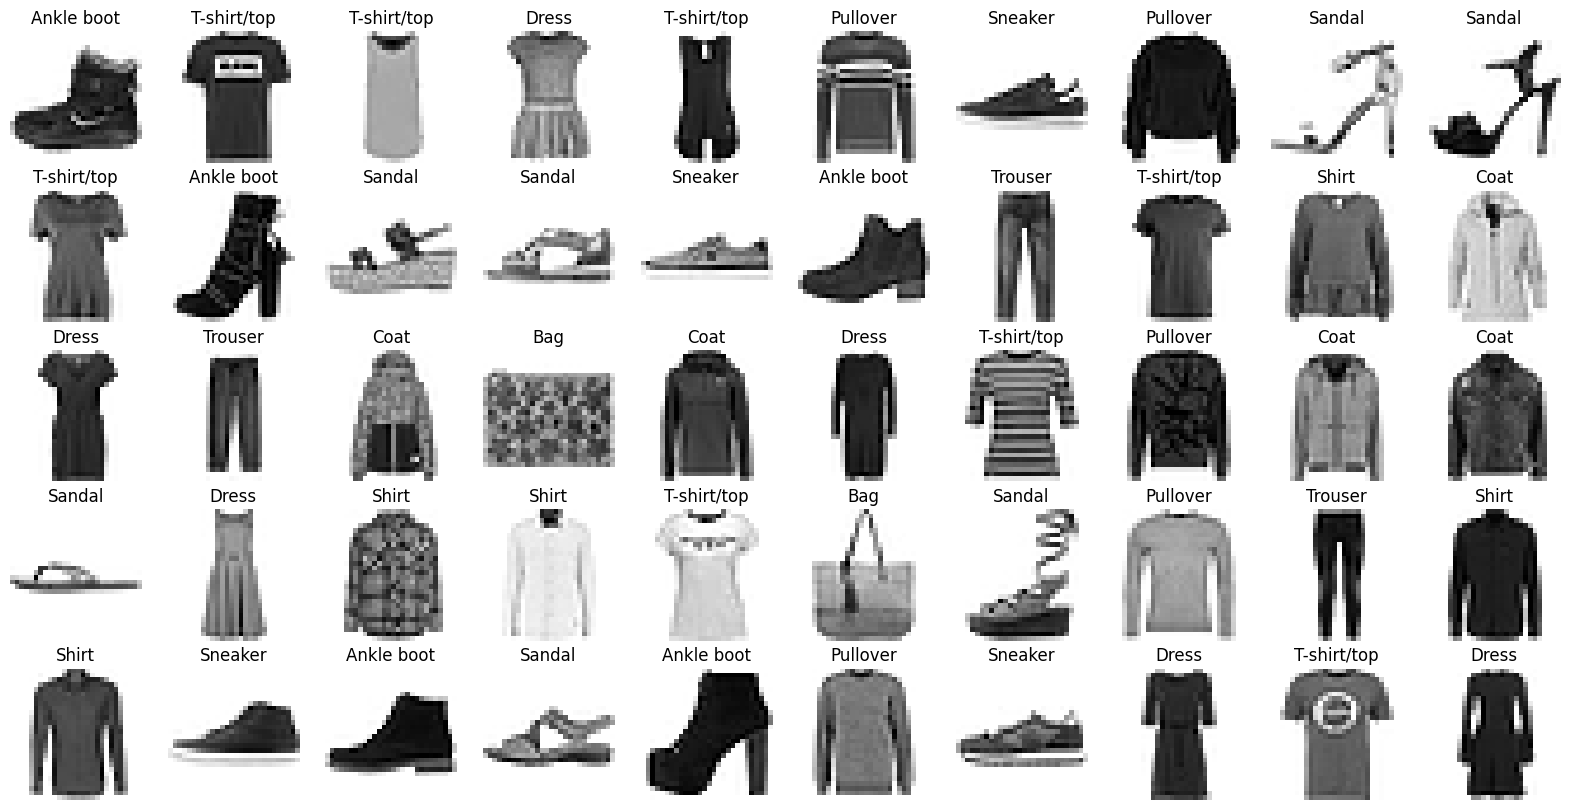

In [4]:
fig, ax = plt.subplots(nrows = 5, ncols = 10)
fig.set_figwidth(20)
fig.set_figheight(10)

idx = 0
for i in range(5):
    for j in range(10):
        ax[i, j].imshow(X_train[idx], cmap = 'binary')
        ax[i, j].set_title(class_names[y_train[idx]])
        ax[i, j].axis('off')
        idx += 1
plt.show()

<hr>

> # **NEURAL NETWORK ARCHETCTURE**
> - `Input Layer`: This specifies the input shape for the model. Each input is an image of size 28x28 pixels. This layer does not have parameters but defines the shape of the input data that will be fed into the network.<br><br>
> - `Flatten Layer`: This layer converts the 2D input (28x28) into a 1D vector (784 elements). It effectively "flattens" the image into a single long vector, which can then be processed by the dense layers.<br><br>
> - `Dense Layers`: This fully connected layer has 300 neurons and uses the ReLU (Rectified Linear Unit) activation function. It introduces non-linearity and allows the network to learn complex patterns. The ReLU function outputs the input directly if it is positive; otherwise, it outputs zero. Dense(units=100, activation='relu'): This dense layer has 100 neurons with ReLU activation, further processing the features learned from the previous layer.<br><br>
> - `Output Layer`:This final dense layer has 10 neurons (one for each class) and uses the softmax activation function. Softmax converts the outputs into probabilities that sum up to 1, with each neuron representing the probability of the input image belonging to a specific class. This is suitable for classification tasks where the goal is to assign the input to one of several classes.

In [26]:
tensorflow.random.set_seed(42)

model = Sequential()

model.add(Input(shape = [28, 28]))
model.add(Flatten())

model.add(Dense(units = 300, activation='relu'))
model.add(Dense(units = 100, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

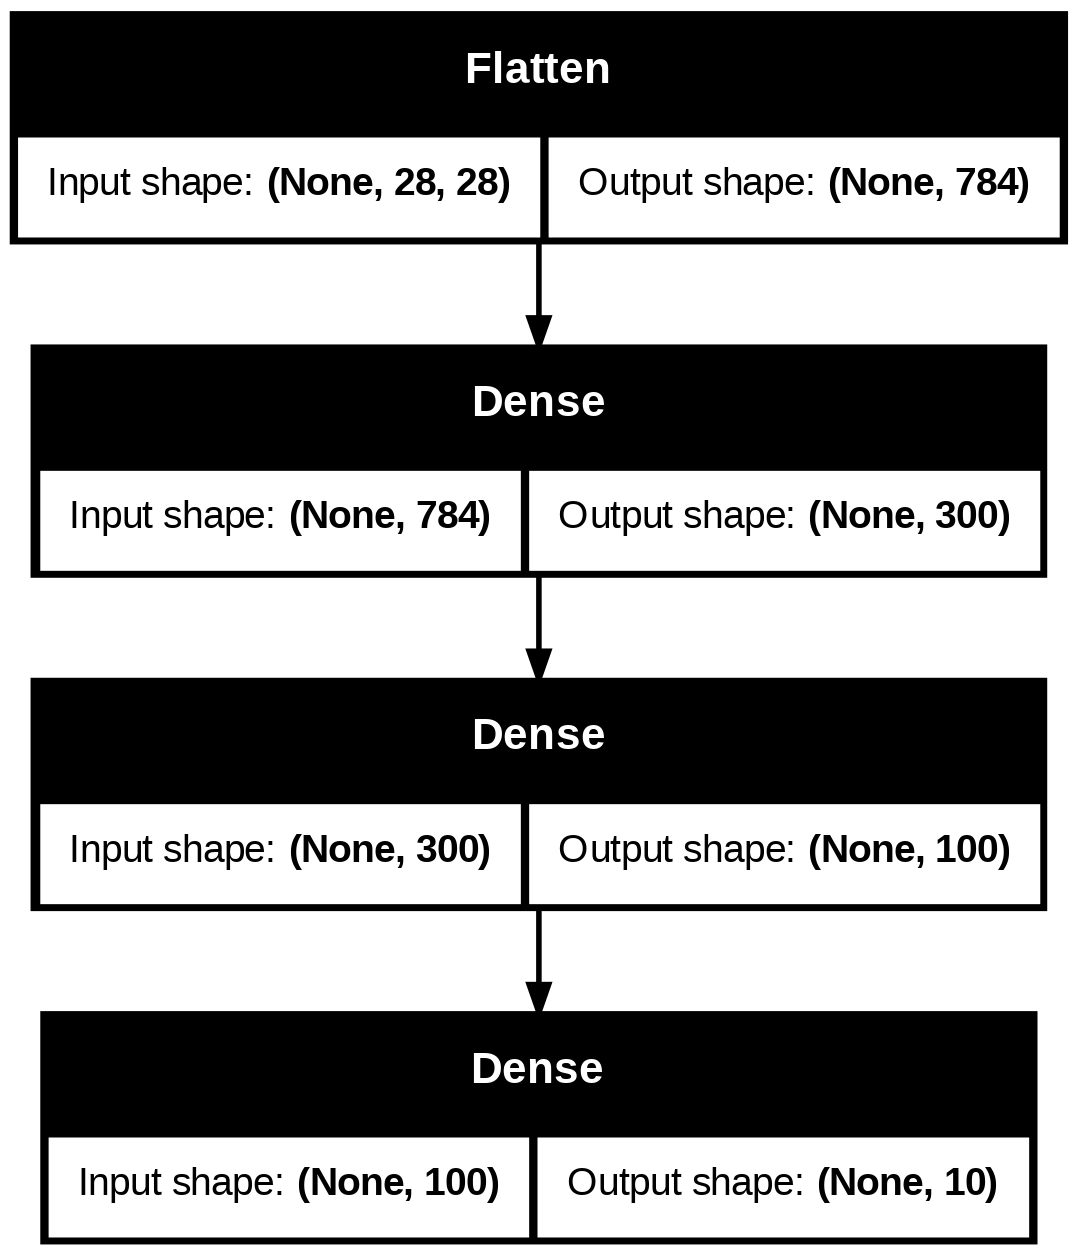

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

>  It is `important to initialize all the hidden layers connection weights randomly`, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus `backpropagation will affect them` in exactly the same way, so they will remain identical. Inother words, `despite having hundreds of neurons per layer, your modelwill act as if it had only one neuron per layer`: it wont be too smart. If instead you randomly initialize the weights, you break the symme try and allow backpropagation to train a diverse team of neurons.

In [29]:
weights, biases = model.layers[1].get_weights()
weights[:5]

array([[-5.9455778e-02,  1.8064082e-03,  6.3341692e-02, ...,
        -6.9218390e-02, -3.3801377e-02,  5.5193901e-02],
       [ 2.4145052e-02, -4.1369002e-02, -6.7817867e-02, ...,
        -4.6000607e-02,  5.6597501e-02,  3.7604637e-02],
       [ 6.1996803e-03, -4.7250204e-02,  2.8284743e-02, ...,
         6.1949685e-02,  2.5530748e-02, -3.8401015e-02],
       [-2.4751261e-02, -4.9352333e-02,  1.2204990e-02, ...,
        -3.6775235e-02, -7.0329562e-02,  6.8766519e-02],
       [-3.9916787e-02,  3.0063093e-05,  5.4240108e-02, ...,
         4.2890683e-03,  2.4133451e-02,  3.0472636e-02]], dtype=float32)

> In the given architecture, the input layer has 784 features (from the flattened 28x28 image). The first dense layer contains 300 neurons. Each of these 300 neurons is connected to all 784 input features, resulting in `784 weights for each neuron`. Additionally, `each neuron has its own bias term`. So, this layer has a total of \( 784 \times 300 \) weights and 300 biases.

In [30]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [31]:
y_train_ohe = to_categorical(y_train, num_classes = 10)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy', FBetaScore(average = 'weighted', beta = 1.0)]
)

In [32]:
history = model.fit(X_train, y_train_ohe, epochs = 30, verbose = 0, validation_split = 0.2)

In [33]:
history.params

{'verbose': 0, 'epochs': 30, 'steps': 1500}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'fbeta_score', 'loss', 'val_accuracy', 'val_fbeta_score', 'val_loss'])

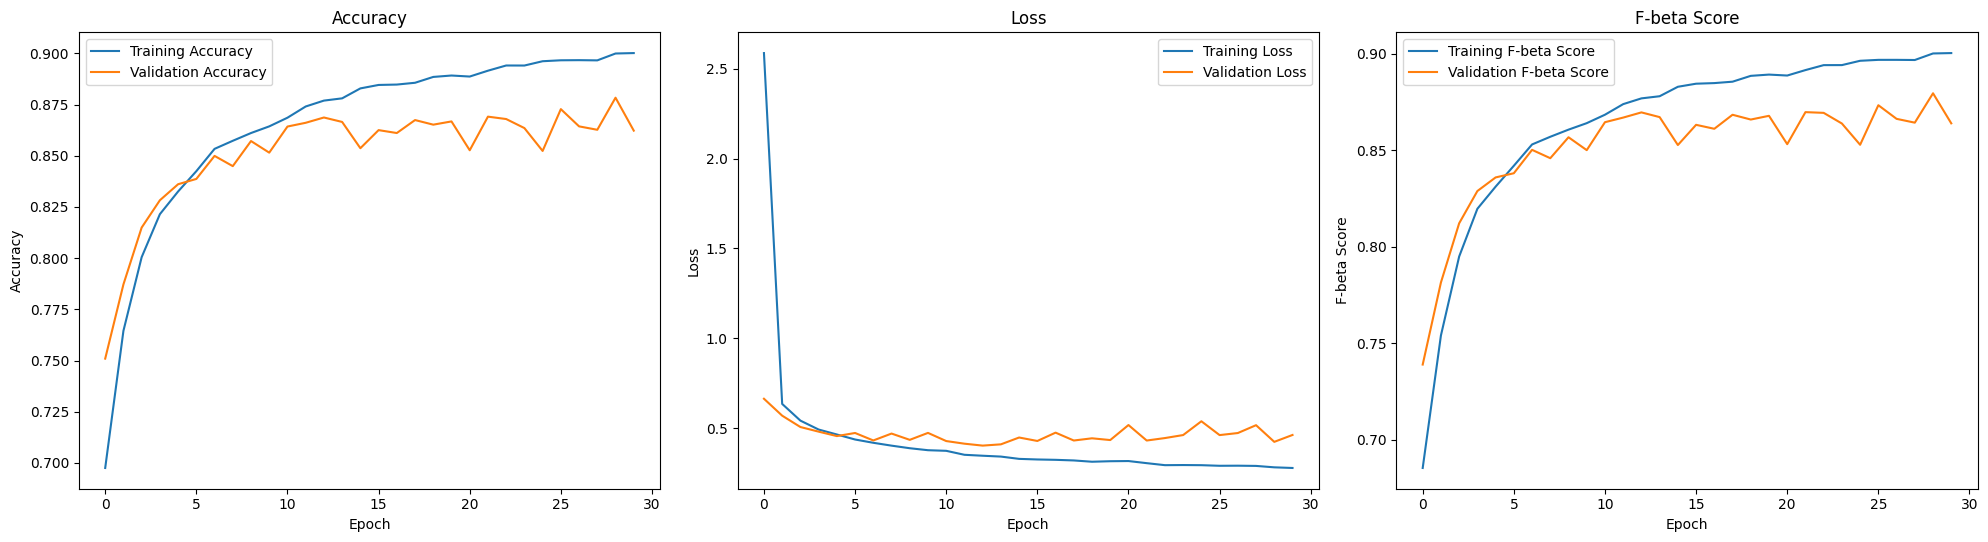

In [37]:
import matplotlib.pyplot as plt

# Create a figure and axis objects with 1 row and 3 columns for the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Plot fbeta_score
axs[2].plot(history.history['fbeta_score'], label='Training F-beta Score')
axs[2].plot(history.history['val_fbeta_score'], label='Validation F-beta Score')
axs[2].set_title('F-beta Score')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('F-beta Score')
axs[2].legend()

# Adjust layout to make room for the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [38]:
model.predict(X_test)[:5] # First 5 image predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.00000000e+00, 4.29091878e-33, 0.00000000e+00, 3.72343897e-33,
        0.00000000e+00, 2.45467527e-04, 0.00000000e+00, 4.24191327e-04,
        1.20231316e-23, 9.99330342e-01],
       [2.44929659e-08, 5.20322361e-26, 9.80261445e-01, 6.38597855e-11,
        1.63460355e-02, 6.09441696e-14, 3.39244842e-03, 4.23023077e-15,
        6.57092736e-09, 7.64147385e-14],
       [3.42752490e-24, 9.99653816e-01, 1.03294225e-36, 1.72312150e-14,
        3.46131477e-04, 0.00000000e+00, 2.78502818e-16, 0.00000000e+00,
        3.93060861e-30, 0.00000000e+00],
       [4.08777728e-18, 9.92219865e-01, 3.08040693e-25, 1.56317859e-09,
        7.78005738e-03, 0.00000000e+00, 1.14934347e-11, 0.00000000e+00,
        9.11622828e-19, 0.00000000e+00],
       [6.41321251e-03, 1.19126480e-27, 4.66545316e-05, 4.71725230e-07,
        4.00329509e-06, 0.00000000e+00, 9.93535638e-01, 0.00000000e+00,
        2.85602186e-09, 0.00000000e+00]], dtype=float32)

> Each prediction provides probabilities for all possible categories, so the category with the highest probability is chosen as the model's prediction.

In [39]:
y_pred = np.argmax(model.predict(X_test), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [40]:
f1_score(y_test, y_pred, average = 'weighted')

0.858034122542707

In [41]:
accuracy_score(y_test, y_pred)

0.8563